## Problem Statement
In an age of content overload, users are also overwhelmed with too many films on streaming services. Customized recommendations would enhance user engagement and satisfaction.

This project aims to build a movie recommendation system that intelligently suggests the top 5 movies a user is likely to enjoy, based on their previous movie ratings. By leveraging collaborative filtering techniques, the system will analyze user preferences and movie similarities to generate tailored suggestions

### Business Understanding 
#### Context

Businesses like Netflix, Amazon Prime, and Hulu rely heavily on recommendation systems to keep users engaged and increase watch time. A well designed recommendation system will:

1. Retain users

2. Enhance user experience

3. Increase revenue from subscriptions

The capacity to narrow down user preferences and recommend movies will not only lead to greater customer sattisfaction;it may also contribute to improving other important business metrics, such as:

1. Rate of click-through

2. Time user spent on the platform 

3. Content discovery

Having a strong recommendation engine is a competitive advantage in the entertainement industry.

### Objectives
1.	Explore and analyze the MovieLens 100K dataset to understand user preferences and movie popularity.

2.	Perform data cleaning and exploratory data analysis (EDA).

3.	Create a user-item interaction matrix to model the relationships between users and movies.


4.	Implement collaborative filtering techniques (e.g., item-based similarity) to generate recommendations.

5.	Build a function to return the top 5 recommended movies for a specific user.

6.	Evaluate the effectiveness of the model using appropriate metrics.

7.	Visualize and interpret the results to derive meaningful business insights

## 1. Data Cleaning 

#### 1.1 Importing Libraries

In [20]:
# import necessary libraries
import pandas as pd
import numpy as np
import sys
import sklearn
import sklearn.metrics
import sklearn.model_selection
import sklearn.preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import os


#### 1.2 Load the data

In [21]:
movies_df = pd.read_csv('ml-latest-small/movies.csv')

In [22]:
ratings_df = pd.read_csv('ml-latest-small/ratings.csv')

In [23]:
links_df = pd.read_csv('ml-latest-small/links.csv')

In [24]:
tags_df = pd.read_csv('ml-latest-small/tags.csv')

#### 1.3 Checking for missing values and duplicates

In [25]:
 #A function to inspect the dataframe shape, datatype and missing values

def inspection(Df):
    #The datatypes and shape of each column
    info=Df.info()
    #The nulls in the dataset
    nulls=Df.isnull().sum()
    #Checking for duplicates
    duplicate=Df.duplicated().sum()
    return info,nulls,duplicate
info,nulls,duplicate=inspection(movies_df)
print(info,'\n')
print(f'-------------nulls---------\n{nulls},\n')
print(f'-------------duplicates--------\n{duplicate}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None 

-------------nulls---------
movieId    0
title      0
genres     0
dtype: int64,

-------------duplicates--------
0


In [26]:
# A function to inspect the dataframe shape, datatype and missing values for ratings_df
def inspection(Df):
    #The datatypes and shape of each column
    info=Df.info()
    #The nulls in the dataset
    nulls=Df.isnull().sum()
    #Checking for duplicates
    duplicate=Df.duplicated().sum()
    return info,nulls,duplicate
info,nulls,duplicate=inspection(ratings_df)
print(info,'\n')
print(f'-------------nulls---------\n{nulls},\n')
print(f'-------------duplicates--------\n{duplicate}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None 

-------------nulls---------
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64,

-------------duplicates--------
0


In [27]:
# A function to inspect the dataframe shape, datatype and missing values
def inspection(Df):
    #The datatypes and shape of each column
    info=Df.info()
    #The nulls in the dataset
    nulls=Df.isnull().sum()
    #Checking for duplicates
    duplicate=Df.duplicated().sum()
    return info,nulls,duplicate
info,nulls,duplicate=inspection(tags_df)
print(info,'\n')
print(f'-------------nulls---------\n{nulls},\n')
print(f'-------------duplicates--------\n{duplicate}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB
None 

-------------nulls---------
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64,

-------------duplicates--------
0


In [28]:
def inspection(Df):
    #The datatypes and shape of each column
    info=Df.info()
    #The nulls in the dataset
    nulls=Df.isnull().sum()
    #Checking for duplicates
    duplicate=Df.duplicated().sum()
    return info,nulls,duplicate
info,nulls,duplicate=inspection(links_df)
print(info,'\n')
print(f'-------------nulls---------\n{nulls},\n')
print(f'-------------duplicates--------\n{duplicate}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB
None 

-------------nulls---------
movieId    0
imdbId     0
tmdbId     8
dtype: int64,

-------------duplicates--------
0


#### 1.4 Dropping the missing values

In [29]:
# Cleaning the links dataframe to remove rows with NaN values in 'tmdbId'
links_cleaned = links_df.dropna(subset=['tmdbId'])
links_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9734 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9734 non-null   int64  
 1   imdbId   9734 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 304.2 KB


#### 1.5 Merging movies and ratings dataframes

In [30]:
# Merging the movies dataframe with the ratings dataframe on 'movieId'
merged_df = pd.merge(movies_df, ratings_df, on='movieId', how='left')
merged_df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,9.649827e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5.0,4.0,8.474350e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,4.5,1.106636e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.5,1.510578e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17.0,4.5,1.305696e+09


## 2.Exploratory Data Analysis(EDA) 

### 2.1 Descriptive Statistics

In [31]:
# describing the merged dataframe to get an overview of its statistics
merged_df.describe()

,movieId,userId,rating,timestamp
count,100854.000000,100836.000000,100836.000000,1.008360e+05
mean,19435.051728,326.127564,3.501557,1.205946e+09
std,35528.850950,182.618491,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,1199.000000,177.000000,3.000000,1.019124e+09
50%,2991.000000,325.000000,3.500000,1.186087e+09
75%,8128.000000,477.000000,4.000000,1.435994e+09
max,193609.000000,610.000000,5.000000,1.537799e+09


### 2.2 Number of Users and Movies

In [32]:
# Getting the number of unique movies and users in the merged dataframe
# This will help in understanding the scale of the dataset
num_movies = merged_df['movieId'].nunique()
num_users = merged_df['userId'].nunique()

print(f'Number of unique movies: {num_movies}')
print(f'Number of unique users: {num_users}')

Number of unique movies: 9742
Number of unique users: 610


#### 2.3 Univariate Analysis
##### 2.3.1 Ratings Distribution

C:\Users\User\AppData\Local\Temp\ipykernel_14516\2235423747.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=merged_df, palette='viridis')


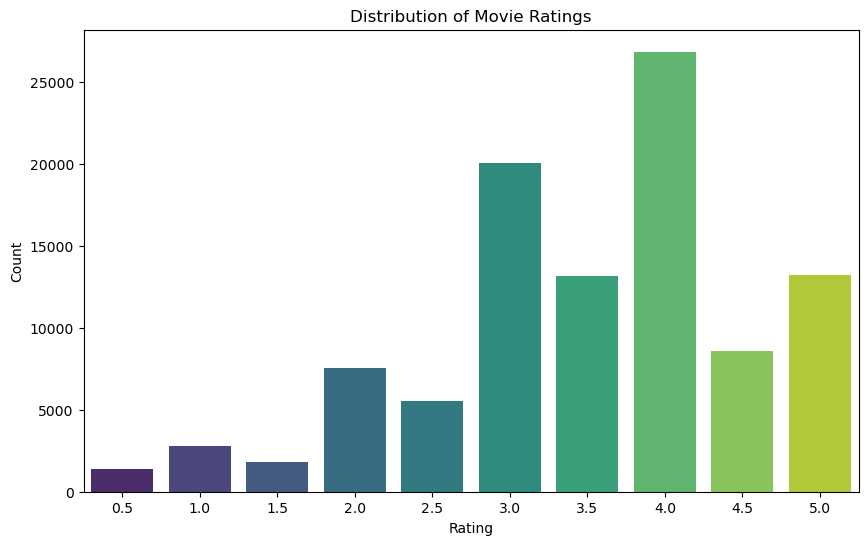

In [33]:
# plotting the distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=merged_df, palette='viridis')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

## Observation 
From the visualization above we observe that 4.0 is the highest rating while 0.5 is the lowest rating.
We also observe most movies are rated 3.0 and above.

##### 2.3.2 Genre Distribution

C:\Users\User\AppData\Local\Temp\ipykernel_14516\2062112202.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')


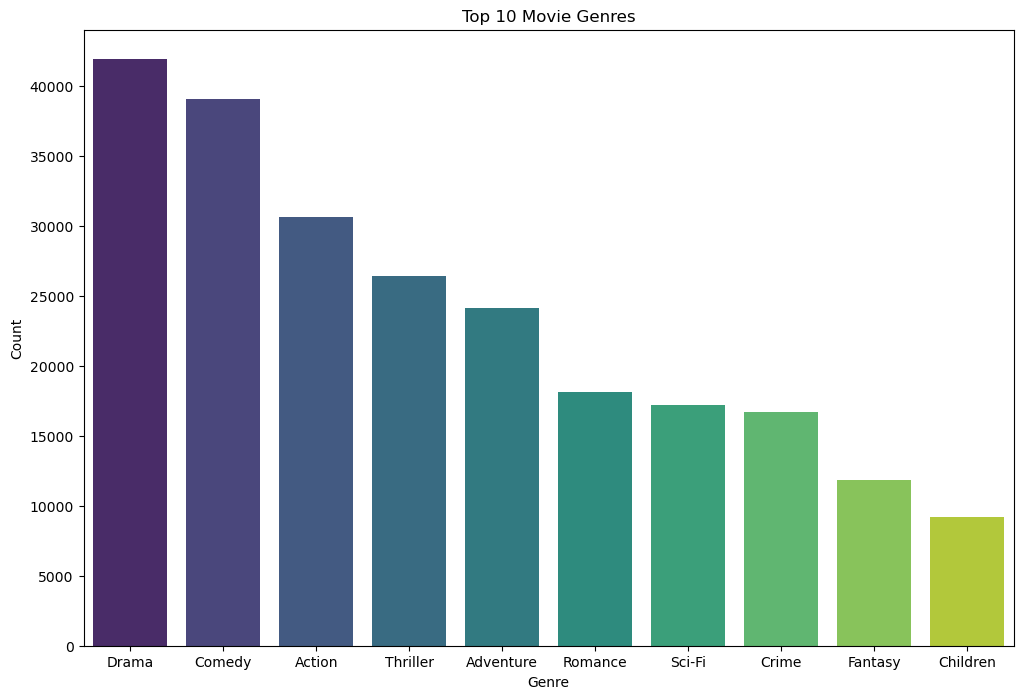

In [34]:
top_genres = merged_df['genres'].str.get_dummies(sep='|').sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')
plt.title('Top 10 Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

## Observation
Within the dataset, the Drama genre is the most prevalent, with over 42,000 entries, followed by Comedy and Action. These three genres overwhelmingly dominate the dataset, suggesting a strong preference or availability for these genres. However, genres such as Crime, Fantasy, and Children have significantly fewer entries, and may hinder the case of diversity and balance in recommendations.

#### 2.4 Bivariate Analysis
##### 2.4.1 Average Ratings by Genres

C:\Users\User\AppData\Local\Temp\ipykernel_14516\1371310661.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_ratings.index, y=genre_ratings.values, palette='viridis')


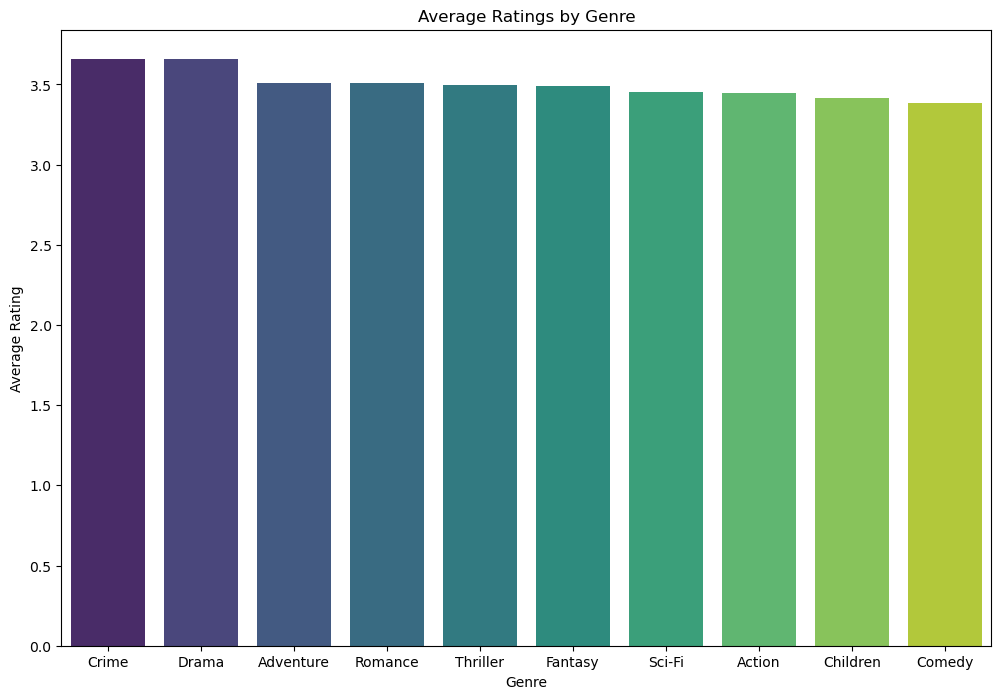

In [35]:
# Create one-hot encoded genre columns
genre_dummies = merged_df['genres'].str.get_dummies(sep='|')

# Combine with merged_df to get ratings and genres together
ratings_with_genres = pd.concat([merged_df[['movieId', 'title', 'rating']], genre_dummies], axis=1)

# plotting ratings by genre
melted = ratings_with_genres.melt(
	id_vars=['movieId', 'title', 'rating'],
	value_vars=top_genres.index.tolist(),
	var_name='genre',
	value_name='is_genre'
)
genre_ratings = melted[melted['is_genre'] == 1].groupby('genre')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_ratings.index, y=genre_ratings.values, palette='viridis')
plt.title('Average Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()

## Observation
Comparing the averages of the genres, Crime and Drama have the highest average ratings at both just above 3.5, suggesting that users are more likely to appreciate serious, story-driven content. In comparison, genres such as Children, Comedy, and Animation have average ratings closer to 3.0, suggesting that these types of movies have more specific tastes or are rated more harshly. This information can help inform the recommendation system so that genre preferences are treated differently when making high-rated movie recommendations

##### 2.4.2 Ratings vs Number of Ratings

Text(0, 0.5, 'Frequency')

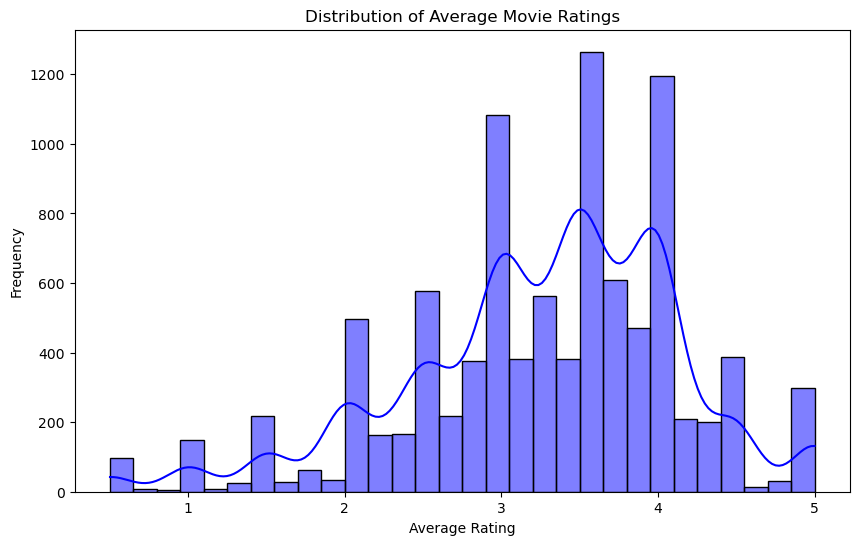

In [36]:
# Analyzing the average ratings for each movie
# Grouping by 'movieId' and calculating the mean and count of ratings
movie_stats = merged_df.groupby('movieId').agg({
    'rating': ['mean', 'count']})
movie_stats.columns = ['mean_rating', 'rating_count']

# plotting the distribution of average ratings
plt.figure(figsize=(10, 6))
sns.histplot(movie_stats['mean_rating'], bins=30, kde=True, color='blue')
plt.title('Distribution of Average Movie Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')


## Observation
The distribution of the average movie ratings is slightly positively skewed, where most movies average ratings between a rating of 3.0 and 4.0. The peak rating appears to be around a rating of 3.5. Therefore, there was seen to be a level of positivity when rating movies, but there were clearly few average ratings at either end of the scale. There may have been a tendency for users to not use an extreme score unless they felt strongly about a movie, which drives most users average ratings toward the middle